In [ ]:
#using ascii xor technique for stegnography
#importing libraries
import numpy as np
import string
import cv2 #opencv for image
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
#ASCII conversion
d={chr(i):i for i in range(255)} #char to askii
c={ i:chr(i) for i in range(255)} #askii to char conversion


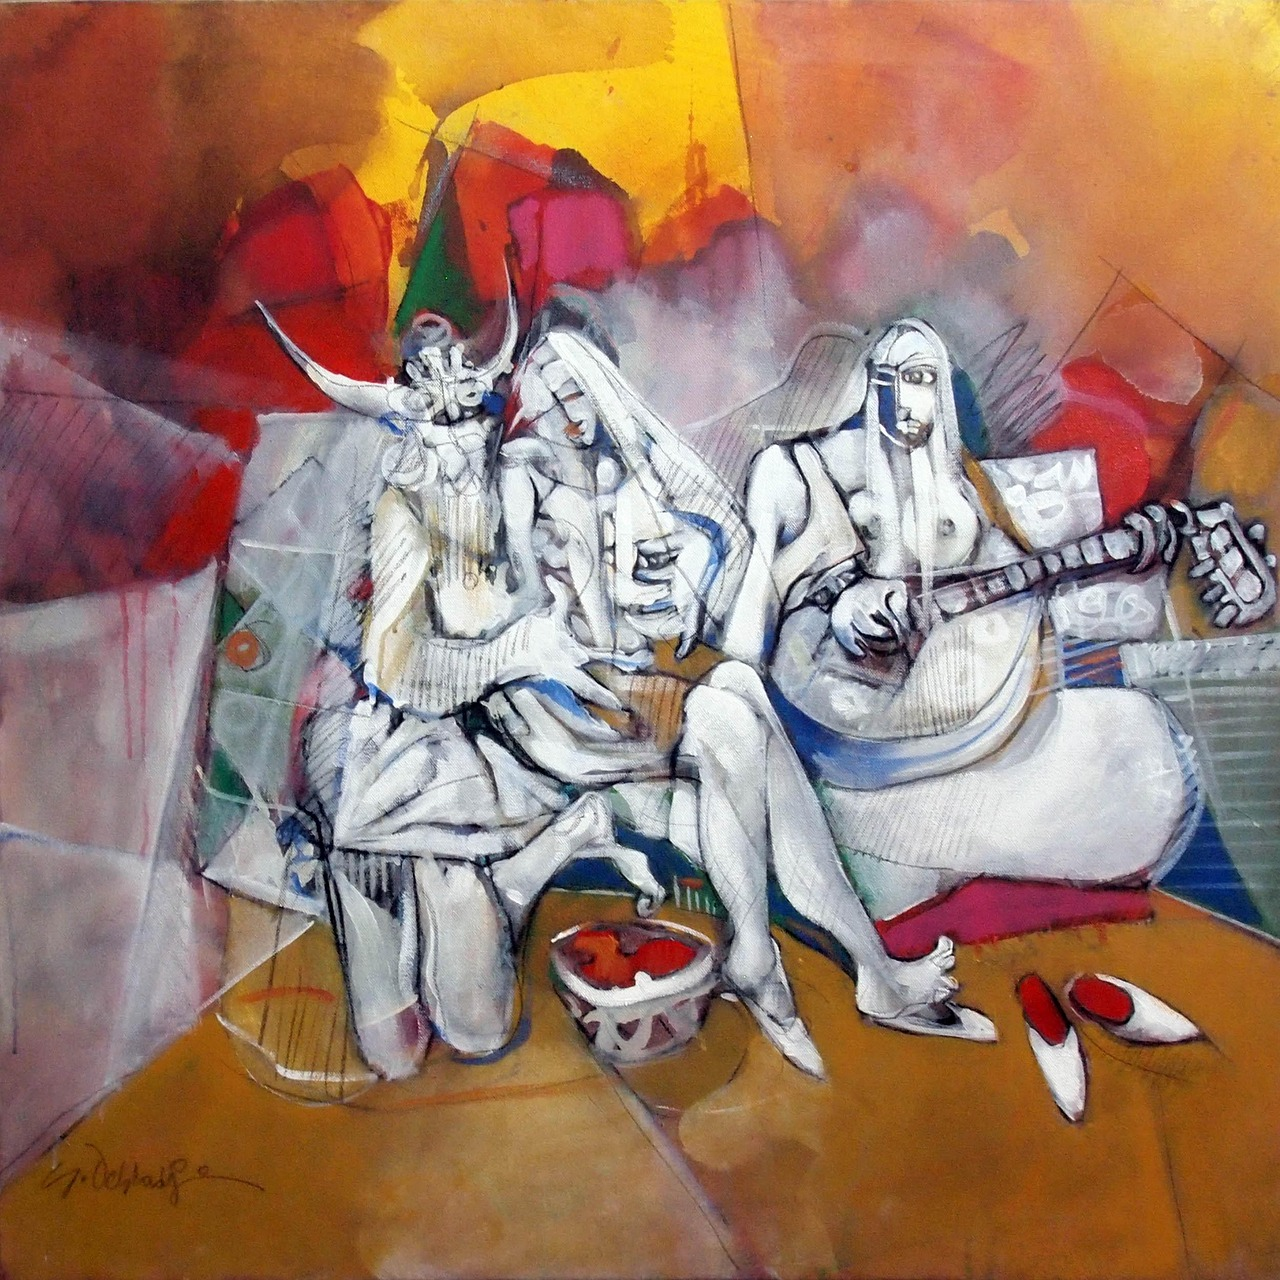

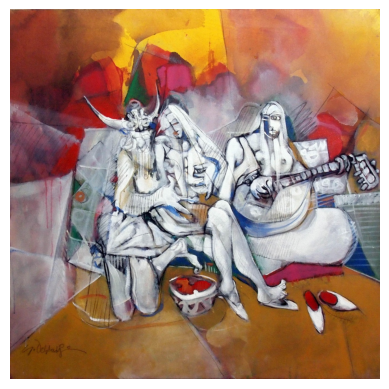

In [ ]:
#load the image
image_path="/content/said-2455984_1280.jpg"
x = cv2.imread(image_path)
cv2_imshow(x)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis("off")
plt.show()

In [ ]:
x.shape


(1280, 1280, 3)

In [ ]:
key="123"
text="secret"

In [ ]:
#ASCII vakues
text_ascii=[d[i] for i in text]#list of asciii value of text word
key_ascii=[d[i] for i in key]#list of asciii value of ket numbers
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [ ]:
#encrypted using pixel modification
x_enc=x.copy()
n=0#number of rows
m=0#number of columns
z=0#color panel
l=len(text)
kl=0
for i in range(l):
  orig_value=x_enc[n,m,z]
  new_vala=d[text[i]]^d[key[kl]]
  x_enc[n,m,z]=new_vala
  n=n+1
  m=m+1
  z=(z+1)%3
  m=(m+1)%3
  kl=(kl+1)%len(key)



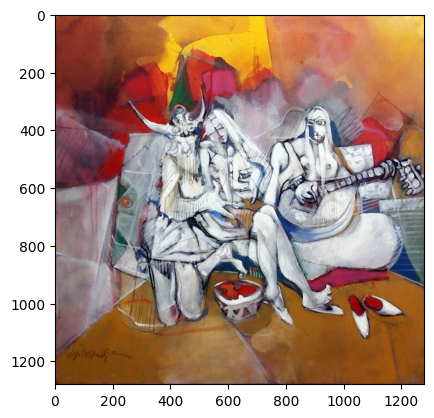

In [ ]:
x_enc_rgb = cv2.cvtColor(x_enc, cv2.COLOR_BGR2RGB)
plt.imshow(x_enc_rgb)


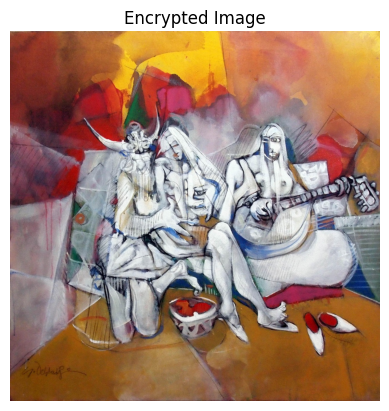

In [ ]:
x_enc_rgb = cv2.cvtColor(x_enc, cv2.COLOR_BGR2RGB)
plt.imshow(x_enc_rgb)
plt.title("Encrypted Image")
plt.axis("off")
plt.show()


In [ ]:
#decrypt image
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
 val=x_enc[n,m,z]
 orign_char=c[val^d[key[kl]]]
 decrypt=decrypt+orign_char

 print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]}{val ^ d[key[kl]]}->`{orign_char}` ")

 n=n+1
 m=m+1
 z=(z+1)%3
 m=(m+1)%3
 kl=(kl+1)%len(key)
print(decrypt)

Decrypting pixel (0,0,0): 66 XOR 49115->`s` 
Decrypting pixel (1,2,1): 87 XOR 50101->`e` 
Decrypting pixel (2,1,2): 80 XOR 5199->`c` 
Decrypting pixel (3,0,0): 67 XOR 49114->`r` 
Decrypting pixel (4,2,1): 87 XOR 50101->`e` 
Decrypting pixel (5,1,2): 71 XOR 51116->`t` 
secret
